### 1. Loading and Preprocessing

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Drop species column (though in sklearn's dataset it's separate)
# Since load_iris returns data and target separately, we'll just use the features
X = iris.data

In [5]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 2. Clustering Algorithm Implementation

#### A) KMeans Clustering

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


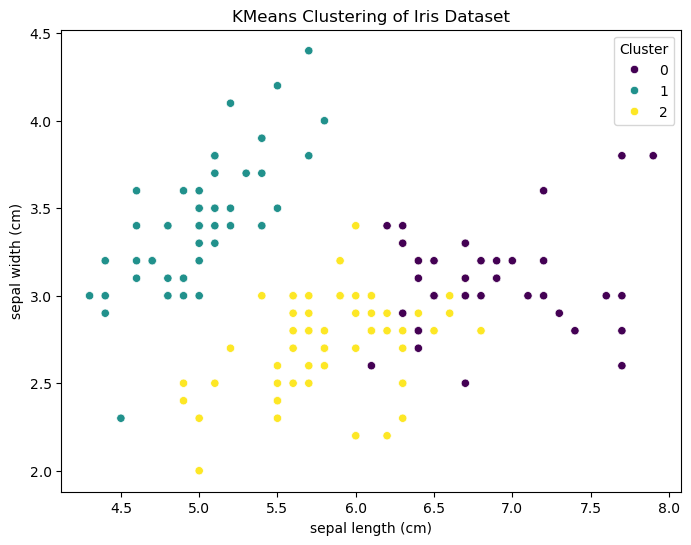

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Add cluster labels to the dataframe
iris_df['Cluster'] = labels

# Visualize the clusters (using first two features for simplicity)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', 
                hue='Cluster', palette='viridis', data=iris_df)
plt.title('KMeans Clustering of Iris Dataset')
plt.show()

#### B) Hierarchical Clustering

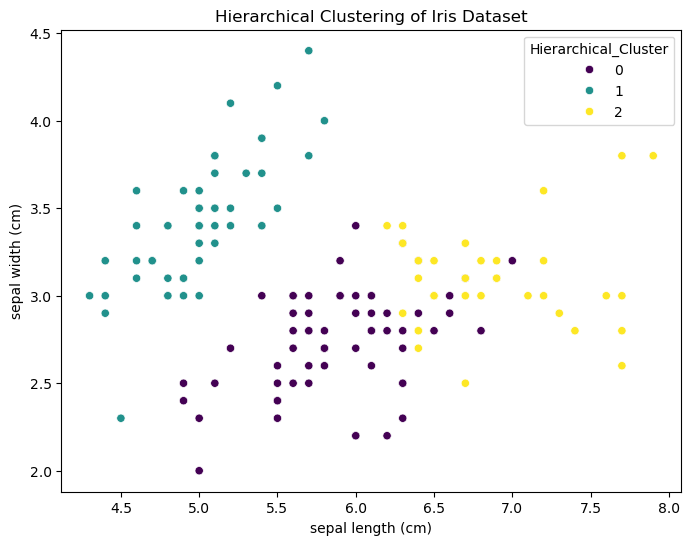

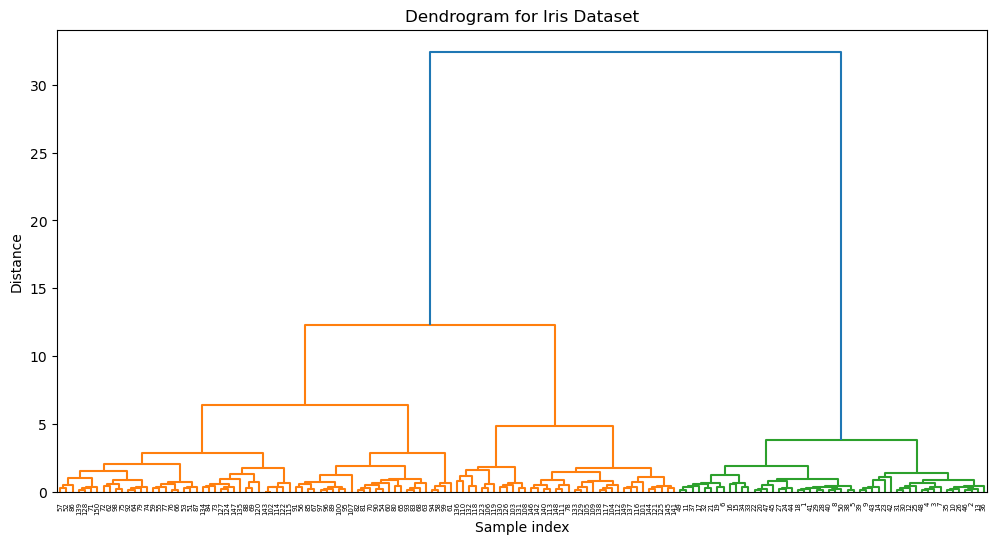

In [17]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Agglomerative Hierarchical Clustering (corrected parameters)
agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(X)

# Add cluster labels to the dataframe
iris_df['Hierarchical_Cluster'] = agg_labels

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', 
                hue='Hierarchical_Cluster', palette='viridis', data=iris_df)
plt.title('Hierarchical Clustering of Iris Dataset')
plt.show()

# Create and plot dendrogram
plt.figure(figsize=(12, 6))
linked = linkage(X, 'ward')
dendrogram(linked, orientation='top',
           labels=range(1, len(X)+1),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Iris Dataset')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

#### Key Observations: